# About the Project

The purpose of the project is to make a system which predict the car price based on the other variables.

# Project Flow

* Ask the question
* Get Data
* Investigate Data
* Prepare Data
* Analyze Data
* Data Preprocessing
* Model Design
* Model Training
* Model Testing

# Ask the question

What is the car selling price?

# Get Data

This step involves the process of locating and obtaining data that is relevant to the question, and then determining if there is enough data to complete the analysis. To proceed, acquire Car price data from Kaggle

In [1]:
import pandas as pd

In [2]:
car_data = pd.read_csv("car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Investigate Data

This step involved assessing the data's completeness and relevance to the analysis.

# Prepare Data

Also known as "data cleaning," this phase involved transforming the data into a suitable format for analysis. The following steps were taken:

#### Shape of the data

In [3]:
car_data.shape

(301, 9)

#### Datatypes

In [4]:
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

#### Information about data

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### Missing Values

In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#### Duplicates

In [7]:
car_data.duplicated().sum()

2

#### Drop Duplicates

In [8]:
car_data = car_data.drop_duplicates()

#### Column Names

In [9]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

#### Unique Values

In [10]:
car_data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

#### Statistical Summary

In [11]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.566332,0.32,1.20,6.10,9.84,92.6
Driven_kms,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


# Analyze Data

Exploratory data analysis (EDA) was conducted to gain deeper insights. Visualization tasks were used to uncover patterns, correlations, and relationships within the data.

#### Explorative Data Analysis

In [12]:
from ydata_profiling import ProfileReport

In [13]:
#initialize profile variable to use it to find the analytics about the data
profile= ProfileReport(car_data,title="Car Price Report", explorative=True)

In [14]:
#Output the report about the data
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Distribution

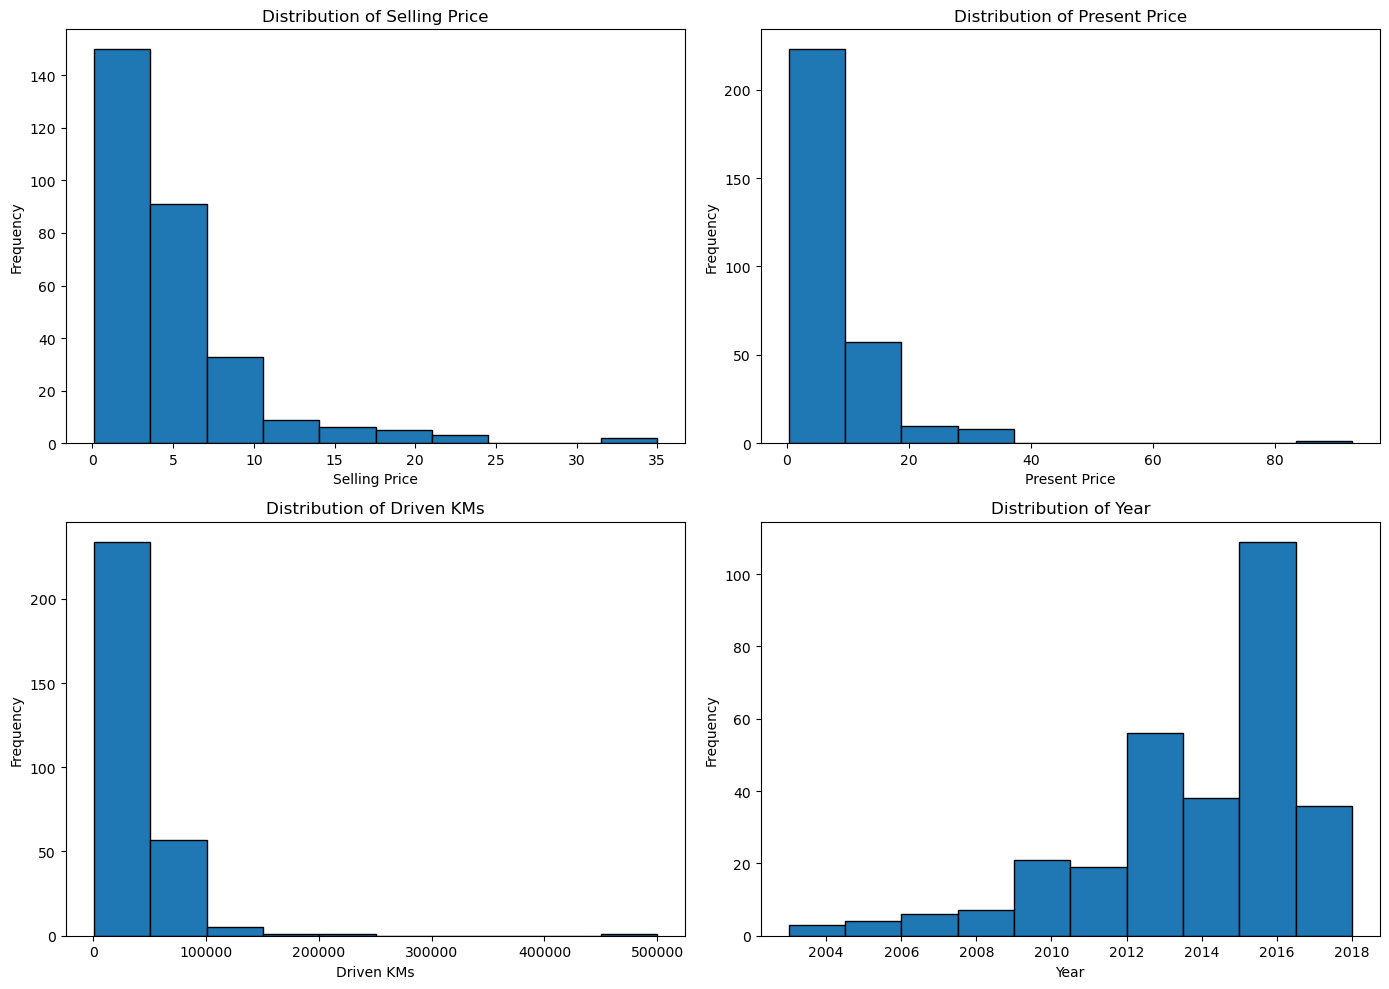

In [16]:
# Create subplots for the distributions of numeric variables
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of Selling Price
axs[0, 0].hist(car_data['Selling_Price'], bins=10, edgecolor='black')
axs[0, 0].set_xlabel('Selling Price')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of Selling Price')

# Distribution of Present Price
axs[0, 1].hist(car_data['Present_Price'], bins=10, edgecolor='black')
axs[0, 1].set_xlabel('Present Price')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of Present Price')

# Distribution of Driven KMs
axs[1, 0].hist(car_data['Driven_kms'], bins=10, edgecolor='black')
axs[1, 0].set_xlabel('Driven KMs')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of Driven KMs')

# Distribution of Year
axs[1, 1].hist(car_data['Year'], bins=10, edgecolor='black')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Distribution of Year')

plt.tight_layout()
plt.show()

#### Relationship

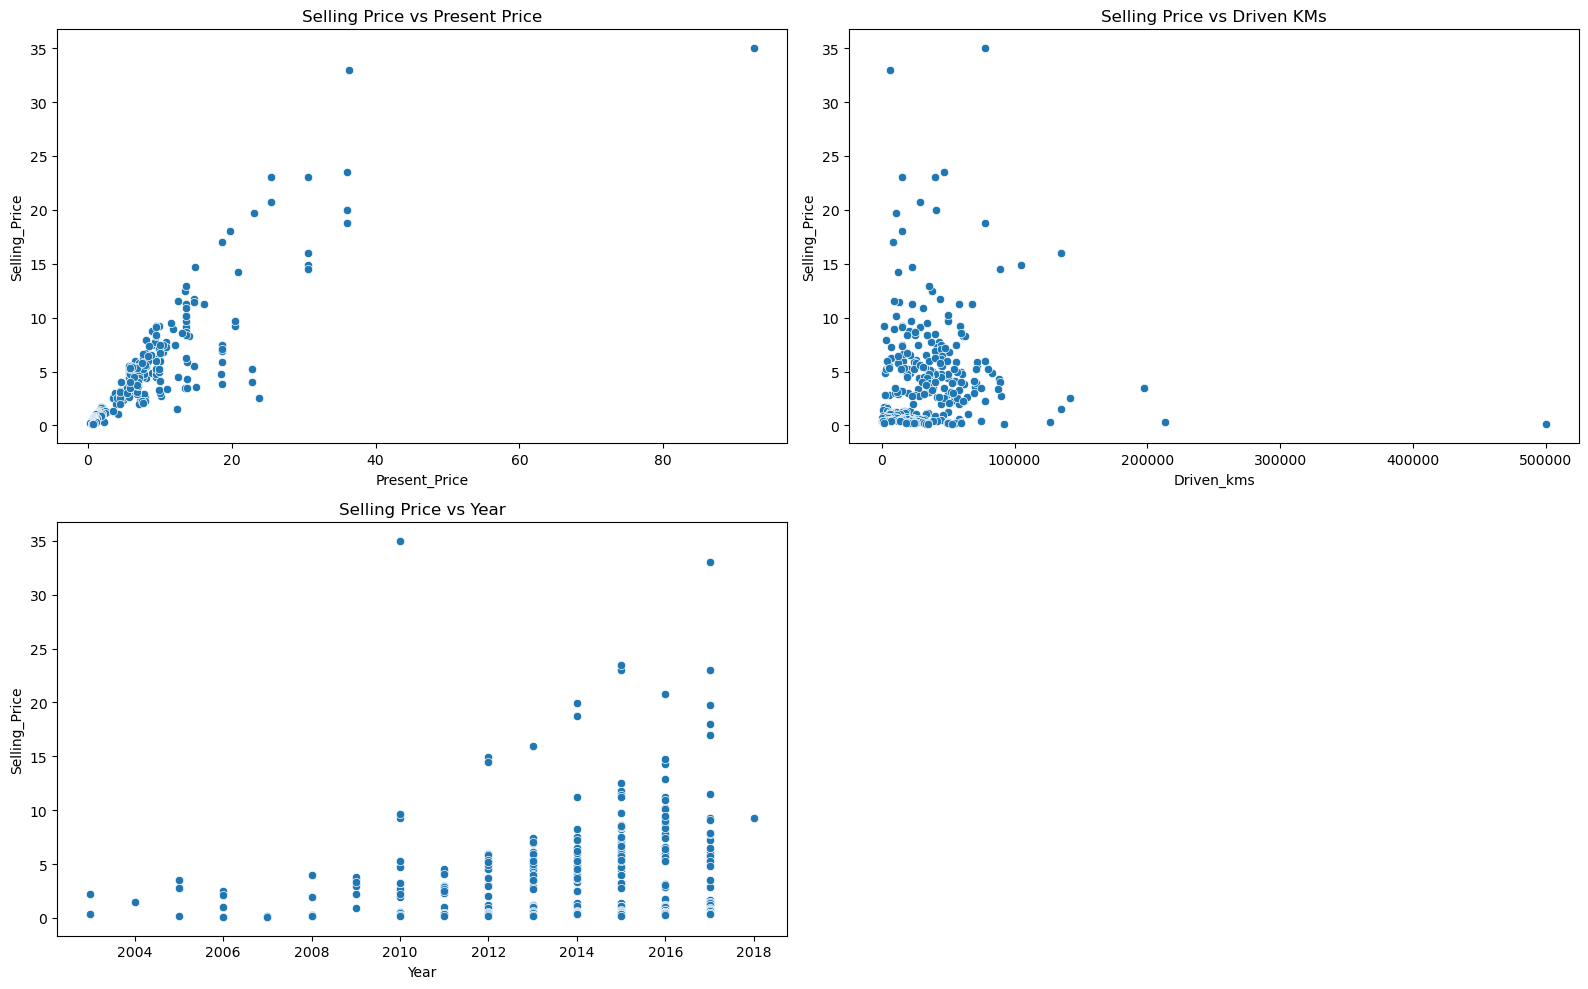

In [17]:
# Scatter plots
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Present_Price', y='Selling_Price', data=car_data)
plt.title('Selling Price vs Present Price')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=car_data)
plt.title('Selling Price vs Driven KMs')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Year', y='Selling_Price', data=car_data)
plt.title('Selling Price vs Year')

plt.tight_layout()
plt.show()

#### Outlier

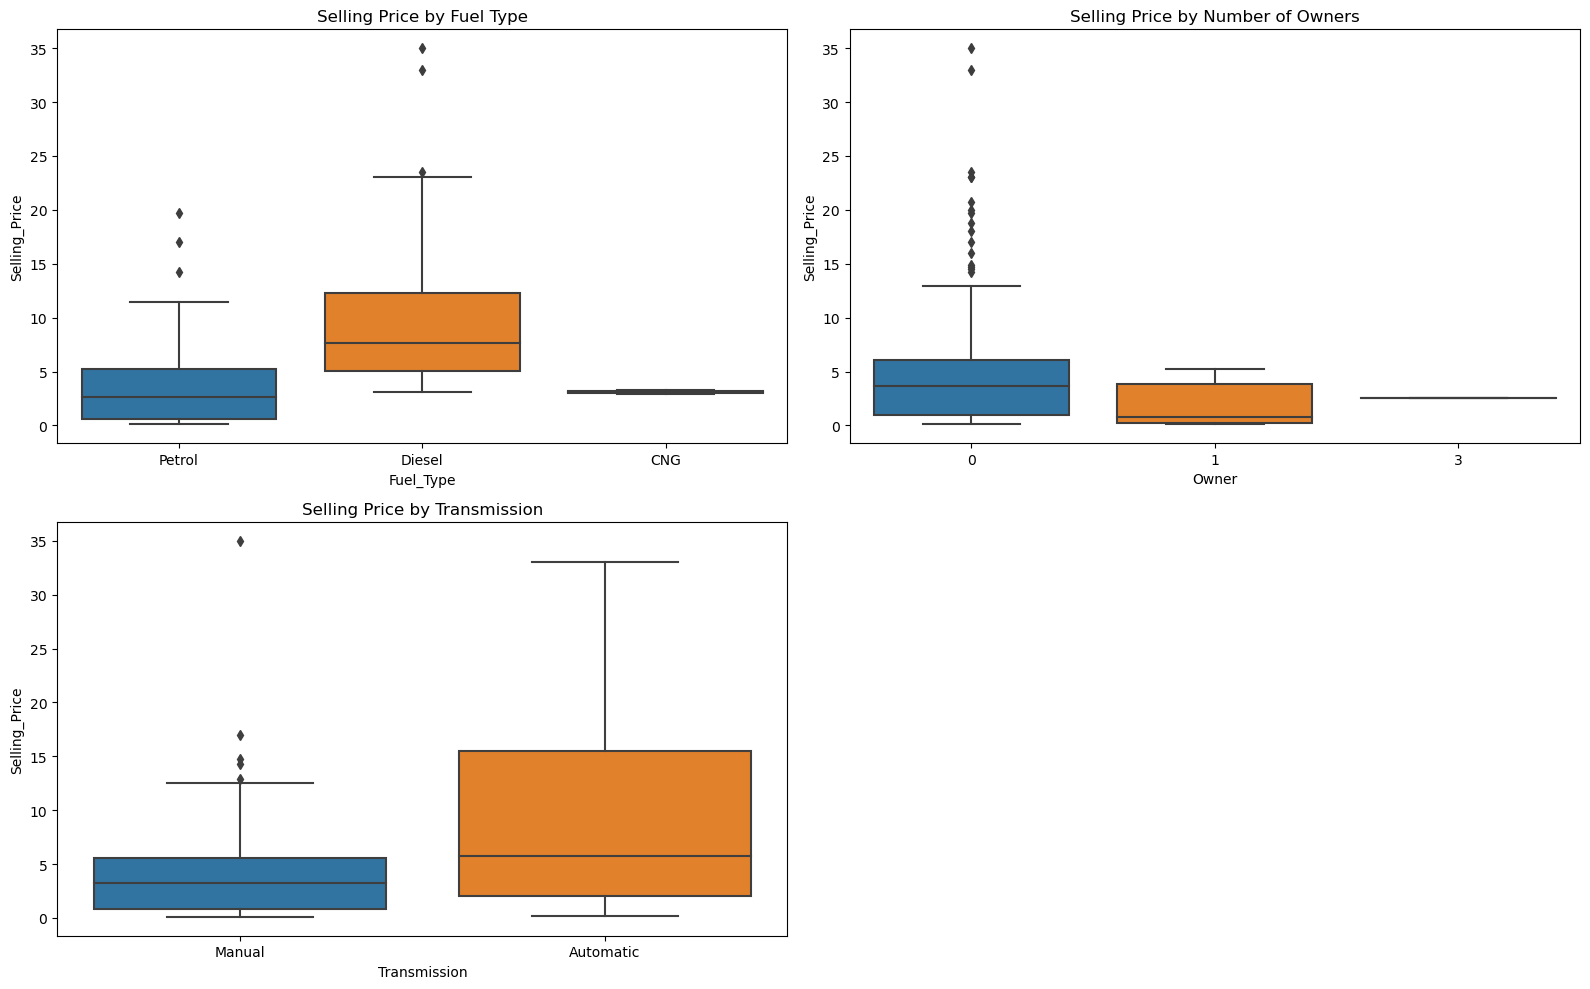

In [18]:
# Box plots
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.title('Selling Price by Fuel Type')

plt.subplot(2, 2, 2)
sns.boxplot(x='Owner', y='Selling_Price', data=car_data)
plt.title('Selling Price by Number of Owners')

plt.subplot(2, 2, 3)
sns.boxplot(x='Transmission', y='Selling_Price', data=car_data)
plt.title('Selling Price by Transmission')

plt.tight_layout()
plt.show()

#### Count Plot

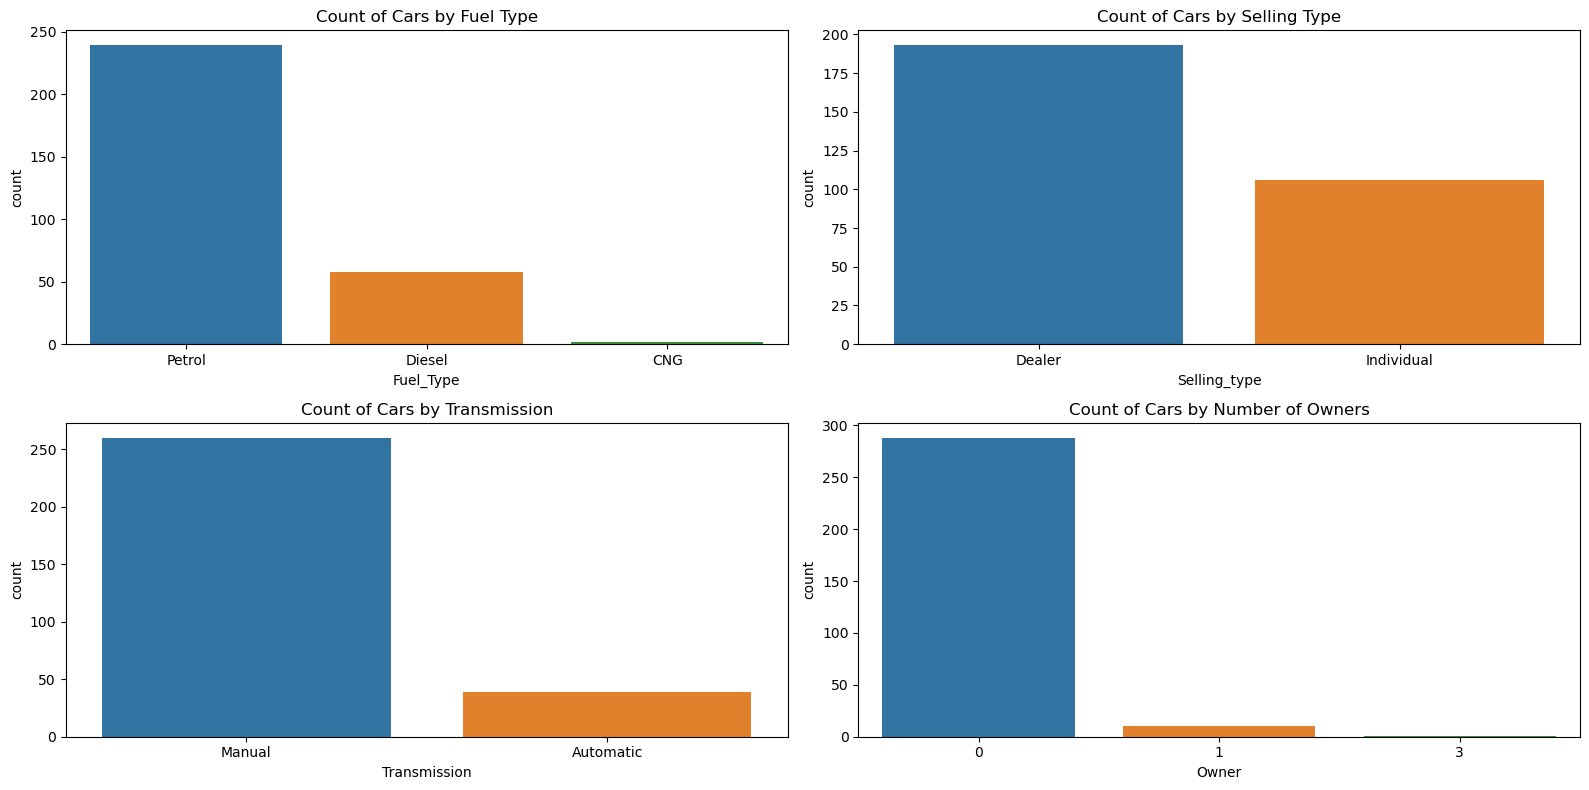

In [19]:
# Count plots for categorical variables
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='Fuel_Type', data=car_data)
plt.title('Count of Cars by Fuel Type')

plt.subplot(2, 2, 2)
sns.countplot(x='Selling_type', data=car_data)
plt.title('Count of Cars by Selling Type')

plt.subplot(2, 2, 3)
sns.countplot(x='Transmission', data=car_data)
plt.title('Count of Cars by Transmission')

plt.subplot(2, 2, 4)
sns.countplot(x='Owner', data=car_data)
plt.title('Count of Cars by Number of Owners')

plt.tight_layout()
plt.show()

#### Top 20 car models

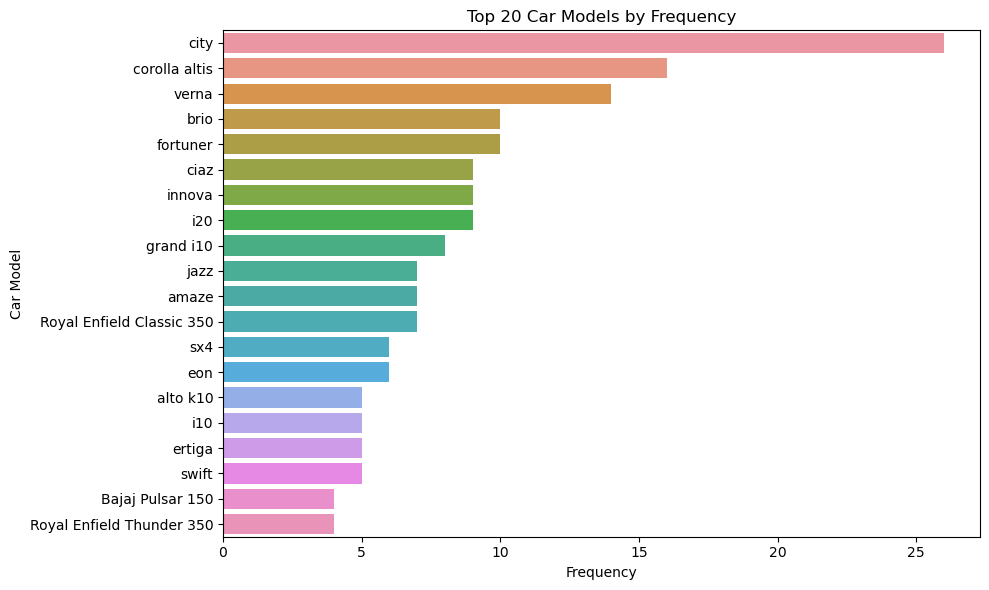

In [20]:
n = 20  # Number of top car models to plot
top_car_models = car_data['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

#### Top 20 car models by average

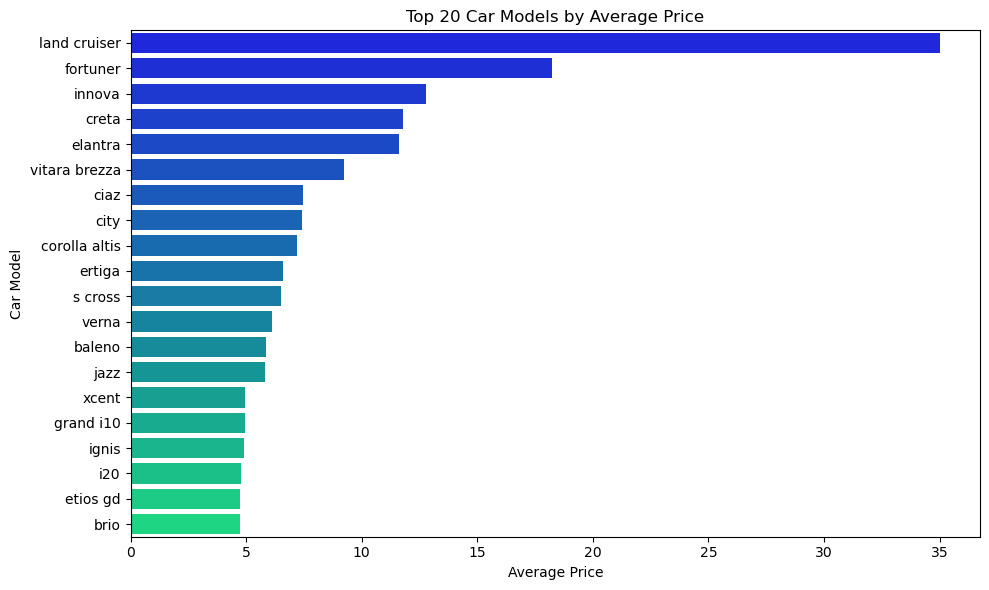

In [21]:
# Calculate average price for each car model
avg_prices_by_car = car_data.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='winter')
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

# Data Preprocessing

To predict the car selling price, the following preprocessing steps were applied:

Label Encoding was used to convert categorical variables to numeric values suitable for machine learning. Standard Scaler was applied to the "Car_Name," "Year," "Selling_Price," "Present_Price," and "Driven_kms" columns to normalize the data between 0 and 1. The data was split into independent and dependent variables and further divided into training (80%) and validation (20%) sets.

#### Convert Categorical variable to numeric

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
# Encode the 'Fuel_Type', 'Selling_type', and 'Transmission' column using Label Encoder
label_encoder = LabelEncoder()
car_data['Fuel_Type'] = label_encoder.fit_transform(car_data['Fuel_Type'])
car_data['Selling_type'] = label_encoder.fit_transform(car_data['Selling_type'])
car_data['Transmission'] = label_encoder.fit_transform(car_data['Transmission'])
car_data['Car_Name'] = label_encoder.fit_transform(car_data['Car_Name'])

#### Normalize the data

In [24]:
from sklearn.preprocessing import StandardScaler
scale=["Car_Name","Year","Selling_Price","Present_Price","Driven_kms"]
scaler = StandardScaler()
car_data[scale]=scaler.fit_transform(car_data[scale])

#### Independent and Dependent variables

In [25]:
X = car_data.drop(columns=['Selling_Price'])
y = car_data['Selling_Price']

#### Split the data into training and testing

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Design

This step involves designing the structure of the model and Linear Regression model was chosen

In [27]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression
model = LinearRegression()

# Model Training

This phase involves training the model on the training dataset

#### Train the model

In [70]:
model.fit(X_train, y_train)

LinearRegression()

# Model Testing


In this phase, the model is evaluated

#### Validate the model on validation dataset

In [71]:
# Make predictions on the validation set
valid_predictions = model.predict(X_valid)

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model using regression metrics
mse = mean_squared_error(y_valid, valid_predictions)
r2 = r2_score(y_valid, valid_predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.2758800416628381
R^2 Score: 0.7349707530639894


#### Prediction Example

In [77]:
# Make predictions
new_car = [[50, 2022, 20000, 0, 1, 1, 0, 0]]  # Example new car data
predicted_price = model.predict(new_car)
print('Predicted Selling Price: R', predicted_price[0])

Predicted Selling Price: R 15549.44818417861


C:\Users\mofok\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
